In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ¿Influye en la sobrevivencia del pasajero la clase en la que viaja?


In [ ]:
df[["Pclass","Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Survived', ylabel='count'>

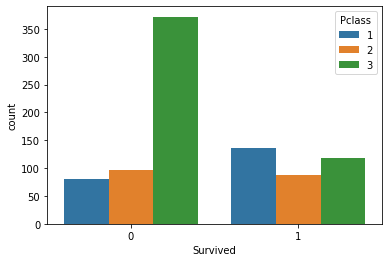

In [ ]:
sns.countplot(x='Survived',hue='Pclass',data=df)

Los resultados nos muestran que la clase en que viajaba el pasajero sí influyó en la probabilidad de su sobrevivencia. El porcentaje de sobrevivientes de primera clase fue de 63%, en segunda clase fue del 47% y en tercera clase del 23%.

### ¿Qué rango de edad aumenta la probabilidad de sobrevivir?


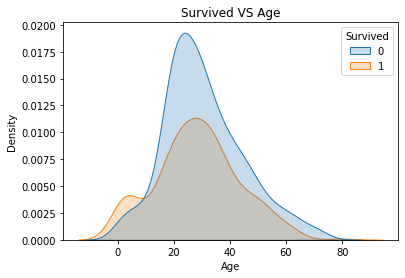

In [ ]:
sns.kdeplot(x = "Age", hue= "Survived", data=df, shade = True)
plt.title("Survived VS Age")
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='Age'>

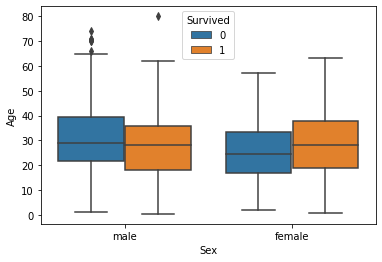

In [ ]:
sns.boxplot(x="Sex",y="Age",hue="Survived",data=df)

El mayor número de sobrevivientes (tanto hombres como mujeres) oscilaban los 30 años , sin embargo, esto no garantiza que tener esa edad sea decisiva para confirmar si el pasajero sobrevive debido a que el número de no sobrevivientes también es elevado en este rango de edad. 

### ¿Influye el 'title' del pasajero en su sobrevivencia?


/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


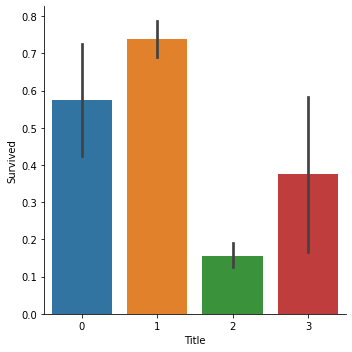

In [ ]:
name=df["Name"]
df["Title"]=[i.split(".")[0].split(",")[-1].strip() for i in name]

df["Title"]=df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in df["Title"]]

f=sns.factorplot(x="Title",y="Survived",data=df,kind="bar")

Los datos muestran que las personas con 'title': miss, ms, mlle y mrs tienen más probabilidad de sobrevivir, seguido por aquellos que tienen el 'title': master. Lo anterior permite inferir que las mujeres y los hombres de alto rango son quienes en mayor medida sobrevivieron. 

### ¿Influye el sexo del pasajero en su sobrevivencia?


In [ ]:
df[["Sex","Survived"]].groupby(["Sex"]).mean().sort_values(by="Survived",ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Survived', ylabel='count'>

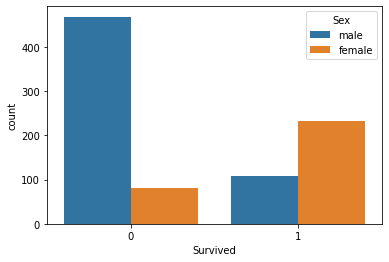

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=df)

El 74% de todas las mujeres sobrevivió, comparado con sólo el 19% del total de los hombres. Ser mujer aumenta las posibilidades de sobreviviencia. 

### ¿Existen cabinas con mayor cercania a chalecos salvavidas o lanchas?

<AxesSubplot:>

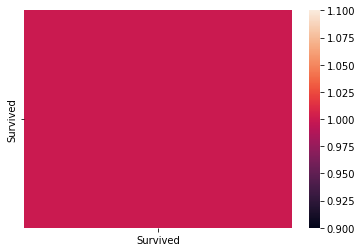

In [ ]:
sns.heatmap(df[["Cabin","Survived"]].corr())

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


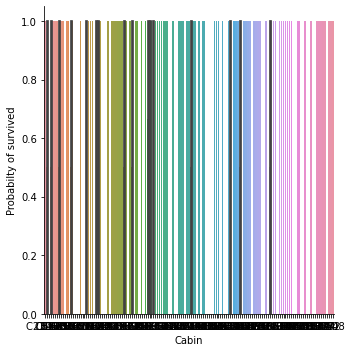

In [ ]:
cabinSurvived=sns.factorplot(x="Cabin",y="Survived",data=df,kind="bar")
cabinSurvived.set_ylabels("Probabilty of survived")
plt.show()

La primer gráfica demuestra que no existe correlación entre la cabina y la sobrevivencia del pasajero, la segunda gráfica rectifica que viajar en cierta cabina no se relaciona directamente con la posibilidad de sobrevivencia del pasajero. 

### ¿Los sobrevivientes viajaban con familia?

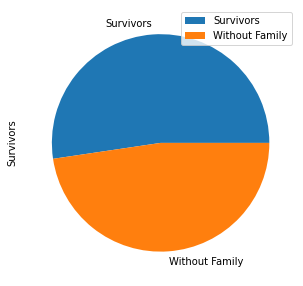

In [ ]:
with_family = df.query('Survived == 1 & (SibSp > 0 | Parch > 0)')
without_family = df.query('Survived == 1 & (SibSp == 0 & Parch == 0)')

n1 = with_family['PassengerId'].count()
n2 = without_family['PassengerId'].count()

df1 = pd.DataFrame({'Survivors': [n1, n2]},
                  index=['Survivors', 'Without Family'])

plot = df1.plot.pie(y='Survivors', figsize=(5, 5))

### ¿Los sobrevivientes pagaron una mayor tarifa?

48.39540760233918
22.117886885245902


<AxesSubplot:xlabel='lab'>

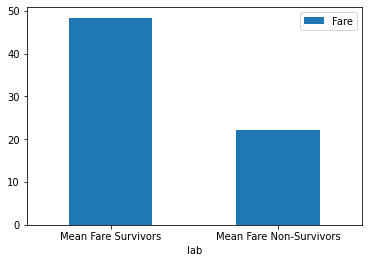

In [ ]:
mean_fare_survivors = df.query('Survived == 1')['Fare'].mean()
print(mean_fare_survivors)

mean_fare_non_survivors = df.query('Survived == 0')['Fare'].mean()
print(mean_fare_non_survivors)

df1 = pd.DataFrame({'lab':['Mean Fare Survivors', 'Mean Fare Non-Survivors'], 'Fare':[mean_fare_survivors, mean_fare_non_survivors]})
df1.plot.bar(x='lab', y='Fare', rot=0)


### ¿El puerto de embarcación  influye en la supervivencia del pasajero?

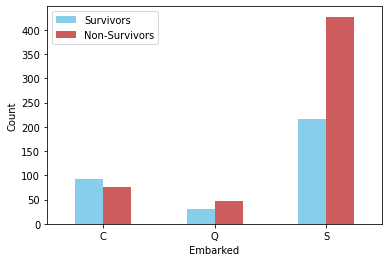

In [ ]:
a = df.query('Survived == 1 & Embarked.notna()')

b = df.query('Survived == 0 & Embarked.notna()')

x = a[["Embarked","Survived"]].groupby(["Embarked"]).count()

y = b[["Embarked","Survived"]].groupby(["Embarked"]).count()

idx = ['C','Q','S']

i = pd.Series(x['Survived'],idx)
j = pd.Series(y['Survived'],idx)

df1 = pd.DataFrame({"Survivors":i,"Non-Survivors":j})
ax = df1.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="")
ax.set_xlabel("Embarked")
ax.set_ylabel("Count")
plt.show()

### ¿El número de ticket tiene relación con la supervivencia?

891
[58, 61, 44, 35, 15, 29, 17, 51, 32]
[42, 39, 56, 65, 85, 71, 83, 49, 68]


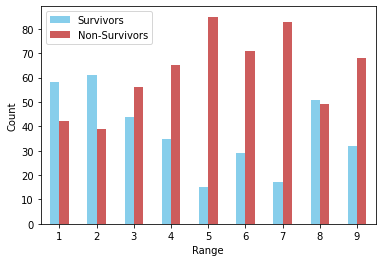

In [ ]:
a = df.sort_values(by=['Ticket'])

print(a["PassengerId"].count())

i1 = (a.iloc[0:100].query('Survived == 1'))['PassengerId'].count()
j1 = (a.iloc[100:200].query('Survived == 1'))['PassengerId'].count()
k1 = (a.iloc[200:300].query('Survived == 1'))['PassengerId'].count()
l1 = (a.iloc[300:400].query('Survived == 1'))['PassengerId'].count()
m1 = (a.iloc[400:500].query('Survived == 1'))['PassengerId'].count()
n1 = (a.iloc[500:600].query('Survived == 1'))['PassengerId'].count()
o1 = (a.iloc[600:700].query('Survived == 1'))['PassengerId'].count()
p1 = (a.iloc[700:800].query('Survived == 1'))['PassengerId'].count()
q1 = (a.iloc[800:].query('Survived == 1'))['PassengerId'].count()

arr1 = [i1,j1,k1,l1,m1,n1,o1,p1,q1]
arr2 = [100-i1,100-j1,100-k1,100-l1,100-m1,100-n1,100-o1,100-p1,100-q1]
print(arr1)
print(arr2)

idx = ['1','2','3','4','5','6','7','8','9']

x = pd.Series(arr1,idx)
y = pd.Series(arr2,idx)

df1 = pd.DataFrame({"Survivors":x,"Non-Survivors":y})
ax = df1.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="")
ax.set_xlabel("Range")
ax.set_ylabel("Count")
plt.show()


### ¿Tener un hijo influye en las posibilidades del pasajero de sobrevivir?

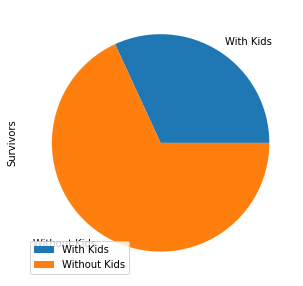

In [ ]:
with_kids = df.query('Survived == 1 & Parch > 0')
without_kids = df.query('Survived == 1 & Parch == 0')

n1 = with_kids['PassengerId'].count()
n2 = without_kids['PassengerId'].count()

df1 = pd.DataFrame({'Survivors': [n1, n2]},
                  index=['With Kids', 'Without Kids'])

plot = df1.plot.pie(y='Survivors', figsize=(5, 5))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=34b6ad67-9899-4609-8c36-e96f39426d07' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>